# Seed dataset

* clustering seeds into groups based on the attributes in the dataset.



In [116]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [11]:
cols = ['Area', 'Perimeter','Compactness','Kernel_Length','Kernel_Width','Assymetry_Coefficient','Kernel_Groove_Length', 'Class']

* laod the dataset

In [20]:
seeds="https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
df=pd.read_csv(seeds,delim_whitespace=True, names=cols)

In [21]:
# print first 5 rows
print(df.head())

    Area  Perimeter  Compactness  Kernel_Length  Kernel_Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Assymetry_Coefficient  Kernel_Groove_Length  Class  
0                  2.221                 5.220      1  
1                  1.018                 4.956      1  
2                  2.699                 4.825      1  
3                  2.259                 4.805      1  
4                  1.355                 5.175      1  


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
Area                     210 non-null float64
Perimeter                210 non-null float64
Compactness              210 non-null float64
Kernel_Length            210 non-null float64
Kernel_Width             210 non-null float64
Assymetry_Coefficient    210 non-null float64
Kernel_Groove_Length     210 non-null float64
Class                    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [99]:
df.shape
df.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Assymetry_Coefficient,Kernel_Groove_Length,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


* now split the columns into feature and target data, 
* since class is integer take it as dependent variable and rest independent

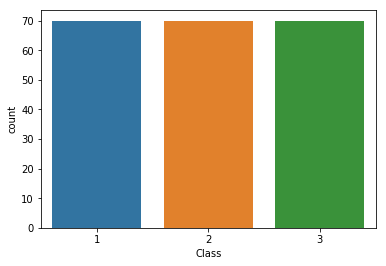

In [122]:
sns.countplot(df["Class"],label="count")
plt.show()

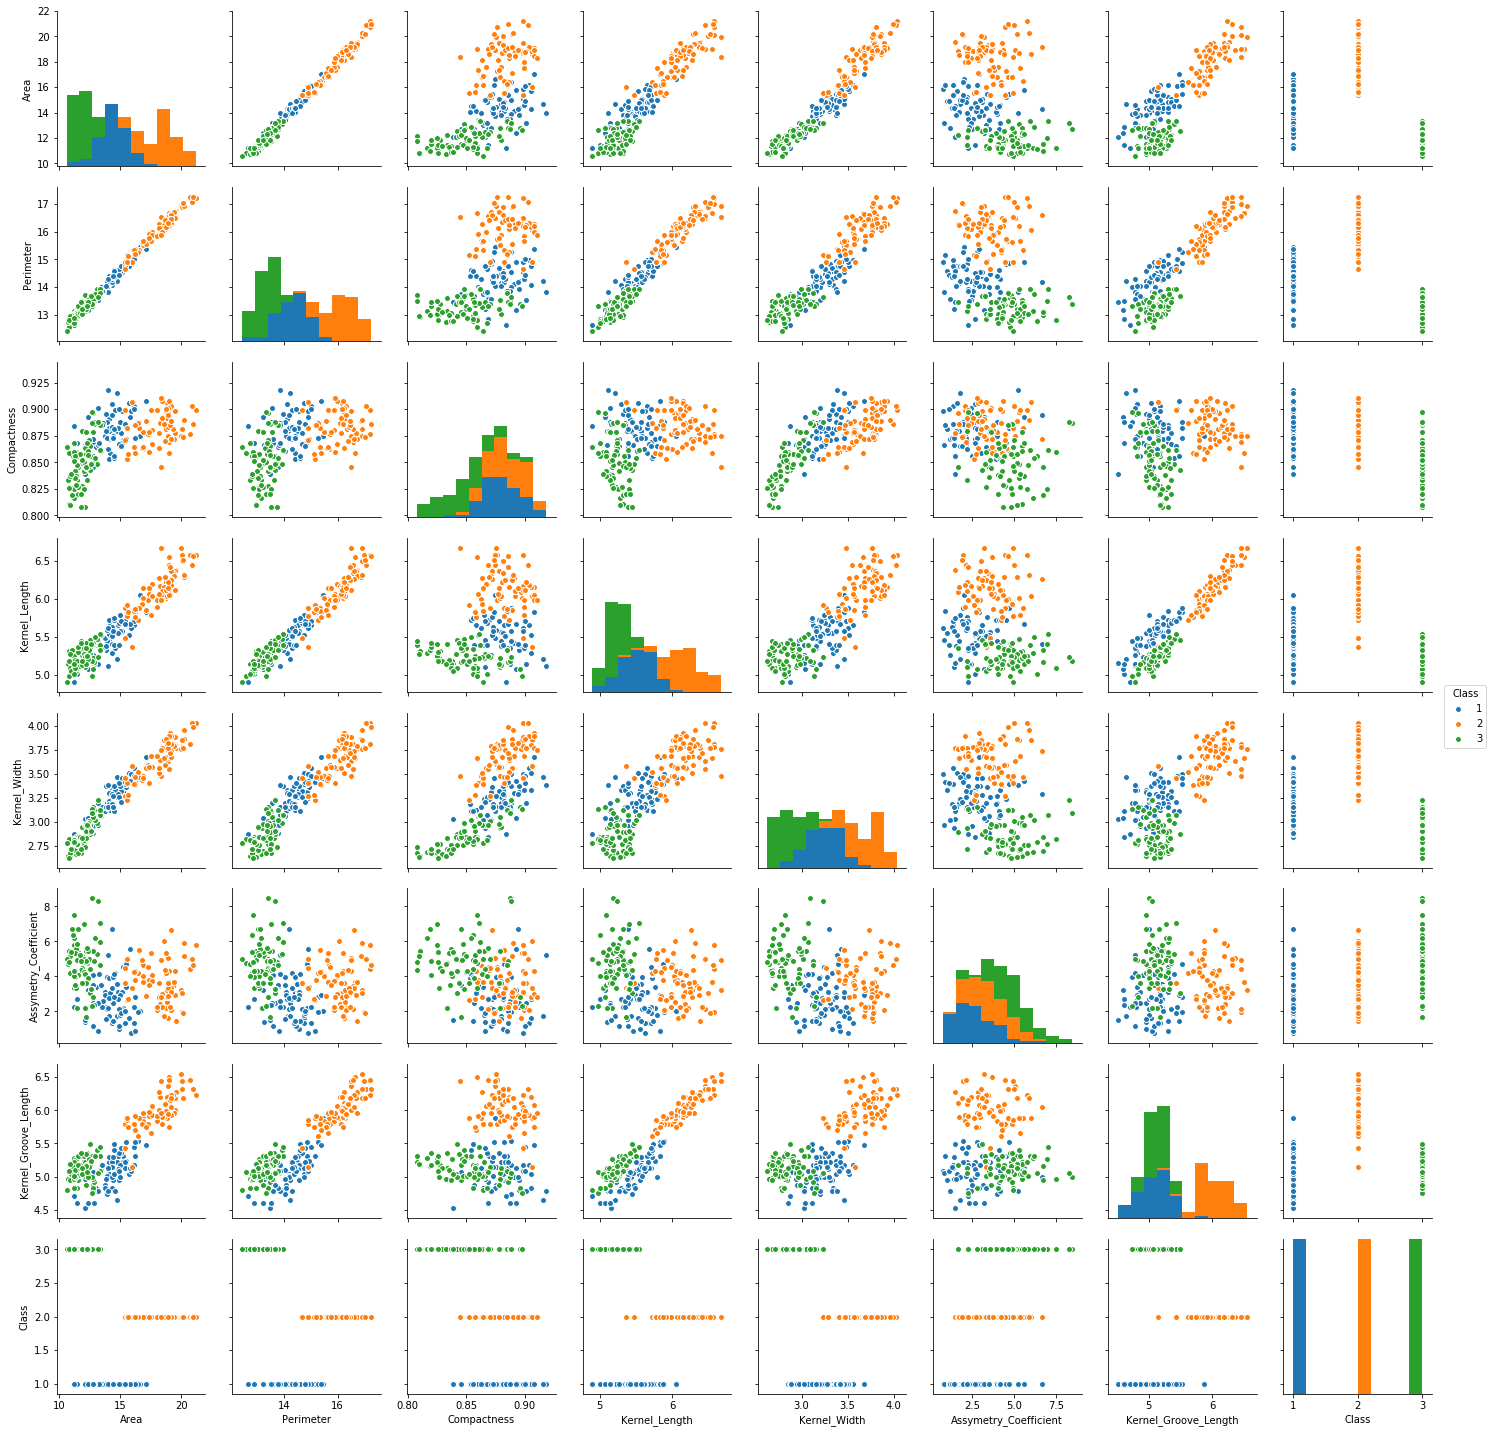

In [124]:
sns.pairplot(df,hue="Class")
plt.show()

In [108]:
feature=df.columns[:-1]
feature

Index(['Area', 'Perimeter', 'Compactness', 'Kernel_Length', 'Kernel_Width',
       'Assymetry_Coefficient', 'Kernel_Groove_Length'],
      dtype='object')

In [109]:
X=df[feature]
y=df["Class"]
X.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Assymetry_Coefficient,Kernel_Groove_Length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [110]:
# split into train and test data
X_train,y_train,X_test,y_test=cross_validation.train_test_split(X,y,test_size=0.4,random_state=0)

In [111]:
X_train.shape, y_train.shape


((126, 7), (84, 7))

# Clustering

In [53]:
# import clustering module and PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [57]:
# reduce the data into 2 components
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(X)
print(reduced_data[:5])

[[ 0.66344838 -1.41732098]
 [ 0.31566651 -2.68922915]
 [-0.6604993  -1.13150635]
 [-1.0552759  -1.62119002]
 [ 1.61999921 -2.18338442]]


In [90]:
Kmeans=KMeans(n_clusters=7)
clusters=Kmeans.fit(reduced_data)
print(clusters)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


# PCA

In [73]:
y.unique()
len(feature)

7

* No of components will be equal to no of feature variables i.e. 7.

In [79]:
# # Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
pca.fit(X)

# Print the components and the amount of variance in the data contained in each dimension
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]
 [ 0.26453354 -0.28251995  0.05903584 -0.40014946  0.31923869  0.06429754
  -0.76193973]
 [-0.19944949  0.57881686 -0.05776023  0.43610024 -0.23416358  0.02514736
  -0.61335659]
 [-0.13717297  0.57475603 -0.05310454 -0.78699776 -0.1448029  -0.00157564
   0.08765361]
 [ 0.28063956 -0.30155864 -0.04522905 -0.11343761 -0.89626785  0.003288
  -0.10992364]
 [ 0.02539824 -0.0658399  -0.99412565 -0.00143143  0.0815499  -0.00114269
  -0.00897193]]
[8.29385197e-01 1.63632452e-01 5.65790880e-03 9.90306086e-04
 2.11180347e-04 1.20677139e-04 2.27879552e-06]


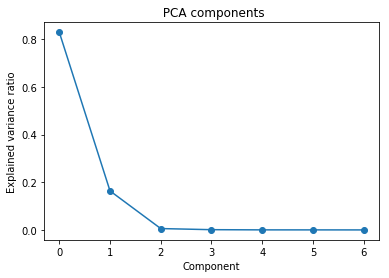

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title(' PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()